In [1]:
%load_ext autoreload
%autoreload 2

In [12]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = ""

import tensorflow.compat.v1 as tf
try:
    tf.config.set_visible_devices([], 'GPU')
    visible_devices = tf.config.get_visible_devices()
    for device in visible_devices:
        assert device.device_type != 'GPU'
except:
    pass

**Obtain 3D Segmentation Data**

In [13]:
from utils import get_3d_seg_data
# Path to the directory contain *.tfrecord
path = '/scr/data/training/'
data = get_3d_seg_data(path)

print(data.keys())

ri1_range_image = data['ri1_range_image']
ri1_label = data['ri1_label']

print(f'{ri1_range_image.shape=}')
print(f'{ri1_label.shape=}')
print(f'{data["legend"]=}')

dict_keys(['ri1_label', 'ri2_label', 'ri1_range_image', 'ri2_range_image', 'legend'])
ri1_range_image.shape=(64, 2650, 4)
ri1_label.shape=(64, 2650, 2)
data["legend"]={'label': ['instance id', 'semantic class'], 'range_image': ['range', 'intensity', 'elongation', 'is_in_nlz']}


**Obtain 2D Segmentation Data**

In [4]:
from utils import get_2d_seg_data
# Path to the directory contain *.tfrecord
path = '/scr/data/training/'
data = get_2d_seg_data(path)

print(data.keys())
print(data['image'].keys())

ri1_range_image = data['ri1_range_image']
ri1_label = data['ri1_label']
ri1_proj = data['ri1_proj']
cam1 = data['image'][1]
cam4 = data['image'][4]

print(f'{ri1_range_image.shape=}')
print(f'{ri1_label.shape=}')
print(f'{ri1_proj.shape=}')
print(f'{cam1.shape=}')
print(f'{cam4.shape=}')
print(f'{data["legend"]=}')

dict_keys(['image', 'ri1_label', 'ri2_label', 'ri1_range_image', 'ri1_proj', 'ri2_range_image', 'ri2_proj', 'legend'])
dict_keys([1, 2, 4, 3, 5])
ri1_range_image.shape=(64, 2650, 4)
ri1_label.shape=(64, 2650, 2)
ri1_proj.shape=(64, 2650, 6)
cam1.shape=(3, 1280, 1920)
cam4.shape=(3, 886, 1920)
data["legend"]={'label': ['instance id', 'semantic class'], 'range_image': ['range', 'intensity', 'elongation', 'is_in_nlz'], 'image': ['cam id', '(C,H,W)'], 'proj': ['first cam id', 'x', 'y', 'second cam id', 'x', 'y']}


**Plotting Range Image**

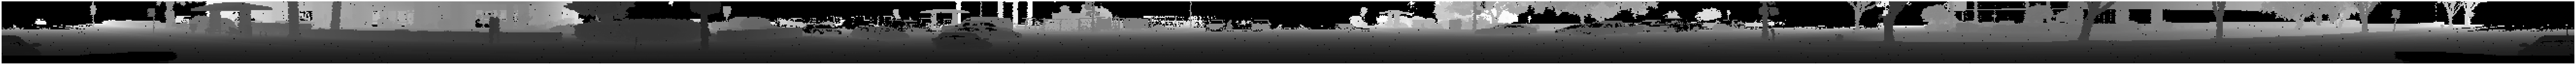

In [5]:
# Individual plot function
from utils import plot_range_image_helper, get_2d_seg_data
# Path to the directory contain *.tfrecord
path = '/scr/data/training/'
data = get_2d_seg_data(path)

plot_range_image_helper(data['ri1_range_image'][..., 0], vmax=75)

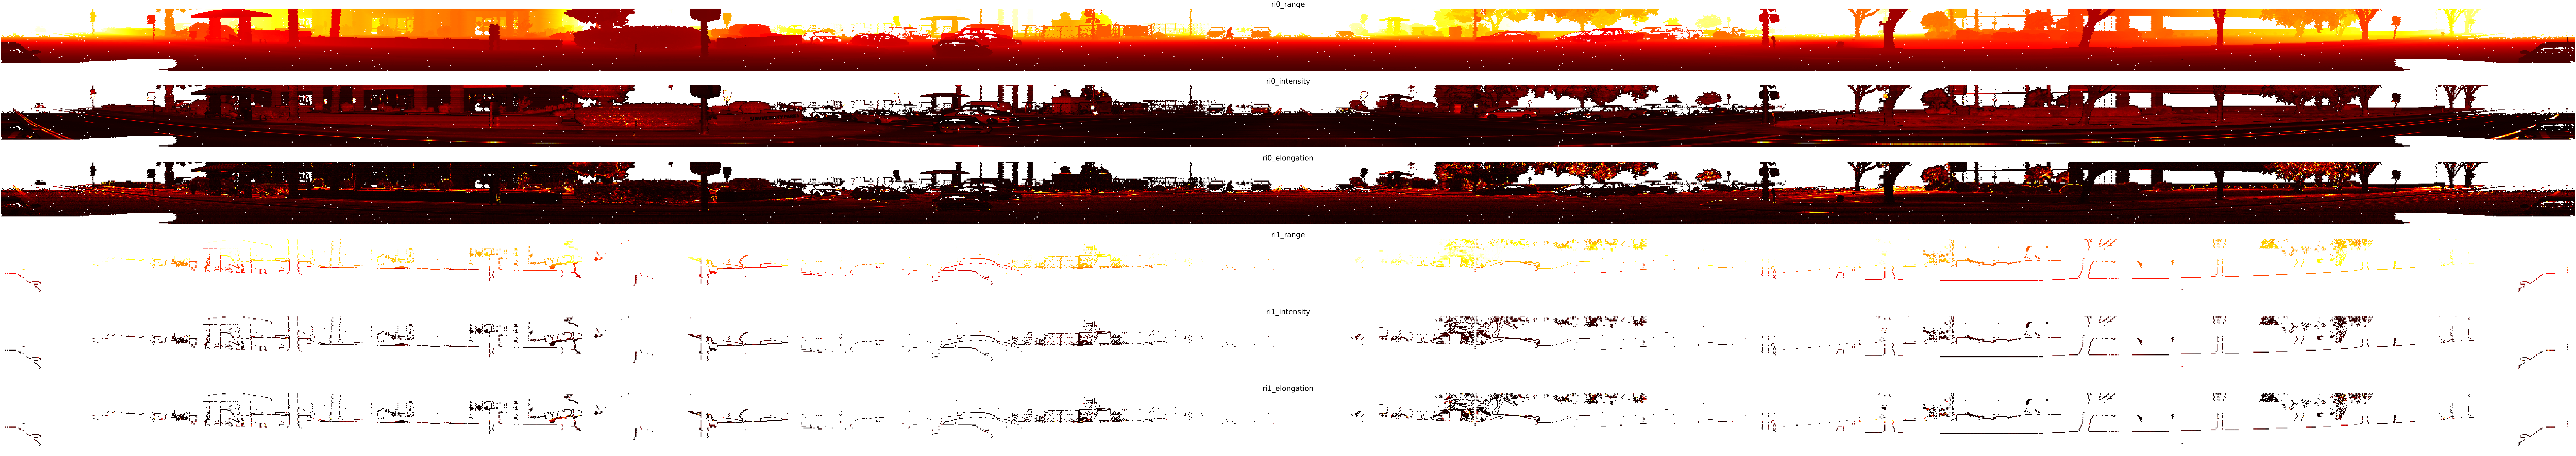

In [6]:
# Plot all range image
from utils import show_range_image_data
# Path to the directory contain *.tfrecord
path = '/scr/data/training/'
data = get_2d_seg_data(path)

show_range_image_data(data, cmap='hot')

**Plot Range Label**

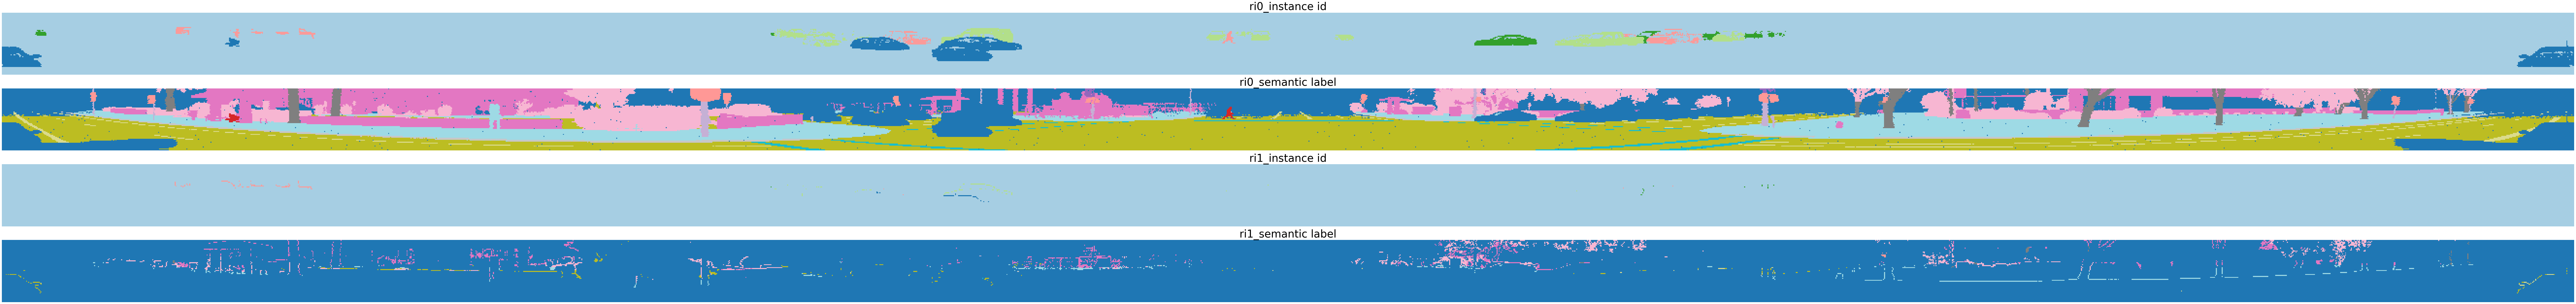

In [7]:
from utils import show_range_image_label, get_2d_seg_data
# Path to the directory contain *.tfrecord
path = '/scr/data/training/'
data = get_2d_seg_data(path)

show_range_image_label(data)

**Plot Range Camera Projection Region**

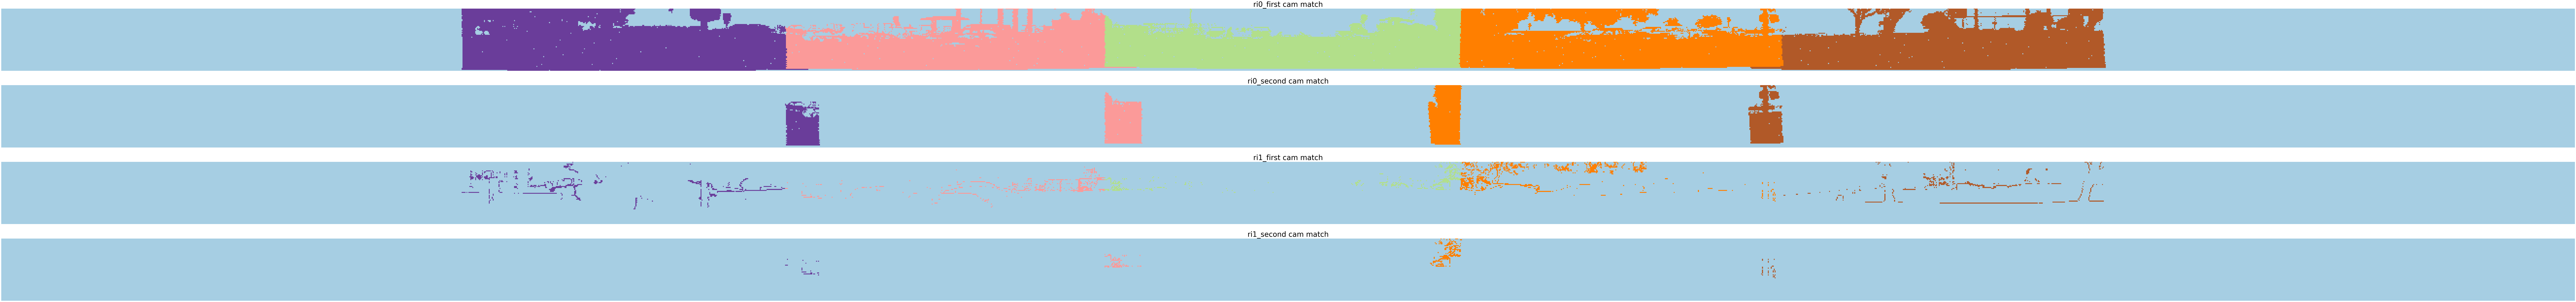

In [8]:
from utils import show_proj_region, get_2d_seg_data
# Path to the directory contain *.tfrecord
path = '/scr/data/training/'
data = get_2d_seg_data(path)

show_proj_region(data)

**Plot Images**

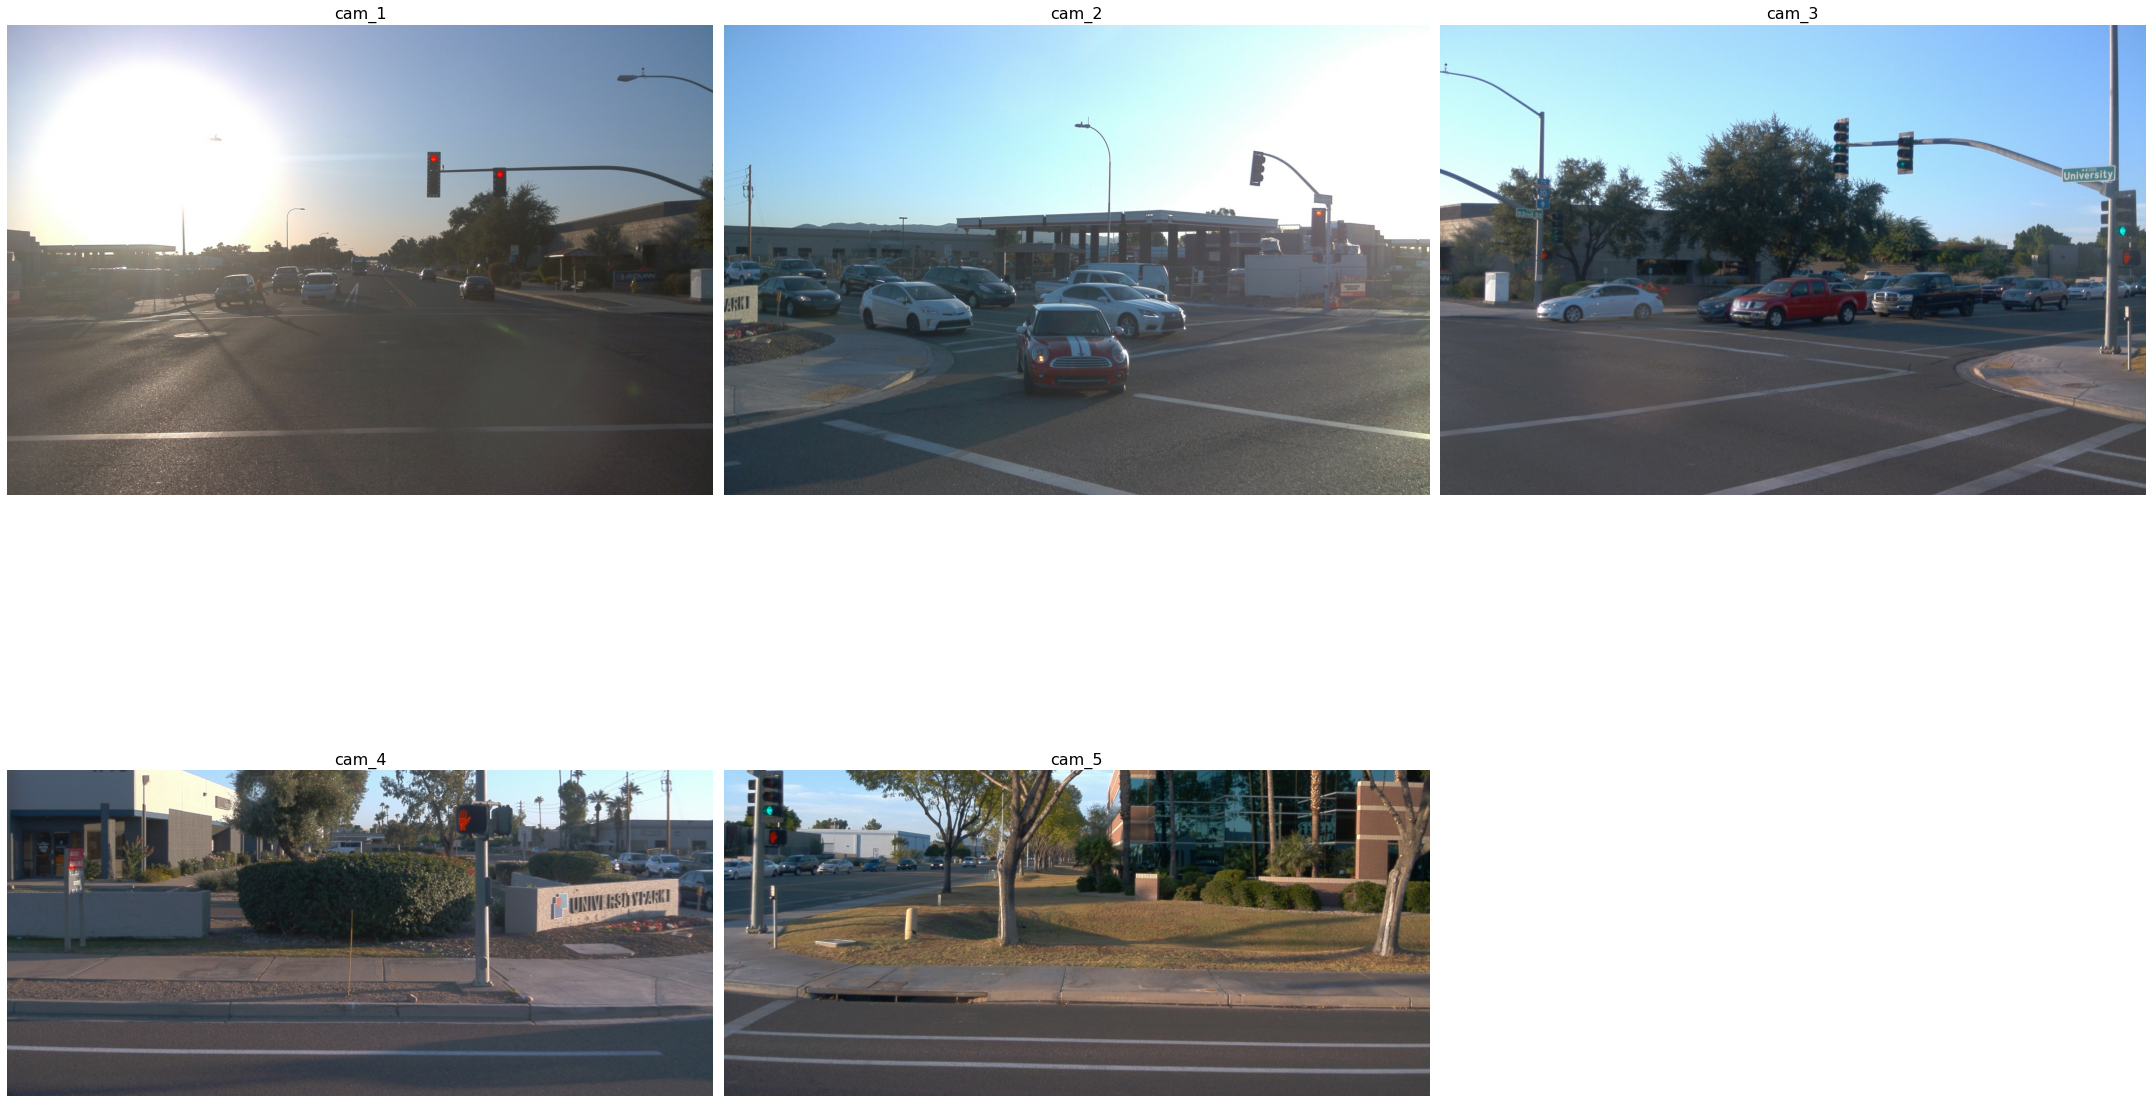

In [9]:
from utils import show_images, get_2d_seg_data
# Path to the directory contain *.tfrecord
path = '/scr/data/training/'
data = get_2d_seg_data(path)

show_images(data)

**Plot Project Pixel on Range Image**

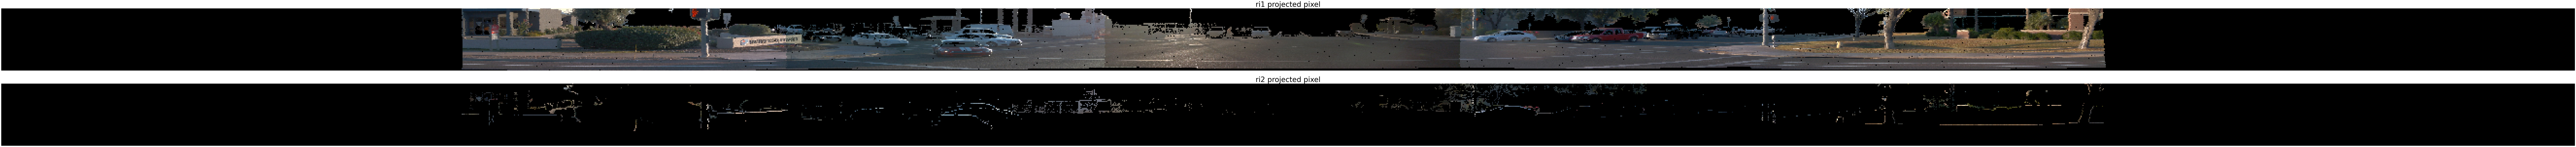

In [10]:
from utils import show_projected_pixel, get_2d_seg_data
# Path to the directory contain *.tfrecord
path = '/scr/data/training/'
data = get_2d_seg_data(path)

# This function only use the first camera projection
show_projected_pixel(data)

**Use h5 data**

In [11]:
from utils import get_data_h5

path = '/scr/data/h5/train.h5'
data = get_data_h5(path, idx=10)

ri1_range_image = data['ri1_range_image']
ri1_label = data['ri1_label']
ri1_proj = data['ri1_proj']
proj_pixel = data['proj_pixel']
cam1 = data['image'][1]
cam4 = data['image'][4]

print(f'{ri1_range_image.shape=}')
print(f'{ri1_label.shape=}')
print(f'{ri1_proj.shape=}')
print(f'{proj_pixel.shape=}')
print(f'{cam1.shape=}')
print(f'{cam4.shape=}')
print(f'{data["legend"]=}')

ri1_range_image.shape=(64, 2650, 4)
ri1_label.shape=(64, 2650, 2)
ri1_proj.shape=(64, 2650, 6)
proj_pixel.shape=(64, 2650, 3)
cam1.shape=(3, 1280, 1920)
cam4.shape=(3, 886, 1920)
data["legend"]={'label': ['instance id', 'semantic class'], 'range_image': ['range', 'intensity', 'elongation', 'is_in_nlz'], 'image': ['cam id', '(C,H,W)'], 'proj': ['first cam id', 'x', 'y', 'second cam id', 'x', 'y'], 'proj_pixel': ['R', 'G', 'B']}
